In [10]:
#arima
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

         date      value
0  2024-01-31  51.684533
1  2024-02-29  51.126515
2  2024-03-31  50.965299
3  2024-04-30  49.730985
4  2024-05-31  50.720278
5  2024-06-30  52.263482
6  2024-07-31  50.830598
7  2024-08-31  50.346985
8  2024-09-30  49.914834
9  2024-10-31  51.712770
10 2024-11-30  50.768225
11 2024-12-31  48.625490
12 2025-01-31  48.353131
13 2025-02-28  46.999409
14 2025-03-31  48.153720
15 2025-04-30  47.121543
16 2025-05-31  46.477764
17 2025-06-30  45.562916
18 2025-07-31  46.234953
19 2025-08-31  45.119144
20 2025-09-30  45.941412
21 2025-10-31  45.063119
22 2025-11-30  45.891140
23 2025-12-31  45.177326
24 2026-01-31  45.260342
25 2026-02-28  45.712216
26 2026-03-31  45.551656
27 2026-04-30  44.655284
28 2026-05-31  46.066894
29 2026-06-30  46.829110
30 2026-07-31  48.035396
31 2026-08-31  47.257139
32 2026-09-30  48.706419
33 2026-10-31  48.826656
34 2026-11-30  50.052563
35 2026-12-31  49.918672
36 2027-01-31  49.798486
37 2027-02-28  48.856073
38 2027-03-31  50.278964


/tmp/ipython-input-711801659.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date=pd.date_range(start='1-1-2024',periods=40,freq="M")


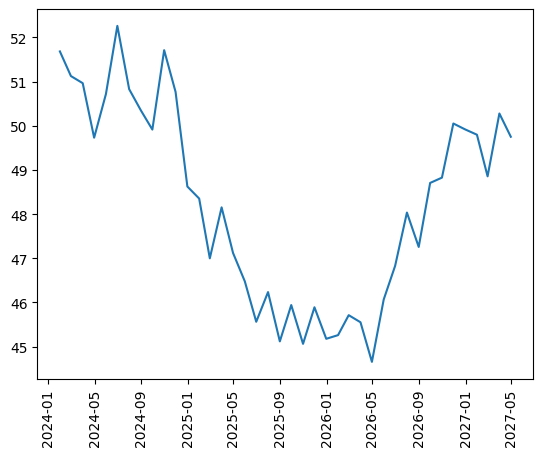

0.04552541998851473
0.00037


In [19]:
date=pd.date_range(start='1-1-2024',periods=40,freq="M")
value=np.cumsum(np.random.randn(40))+50
df=pd.DataFrame({'date':date,'value':value})
print(df)
plt.plot(df['date'],df['value'])
plt.xticks(rotation=90)
plt.show()
result=adfuller(df['value'])
print(result[1])
diffr=df['value'].diff().dropna()
result=adfuller(diffr)
print(f"{result[1]:.5f}")

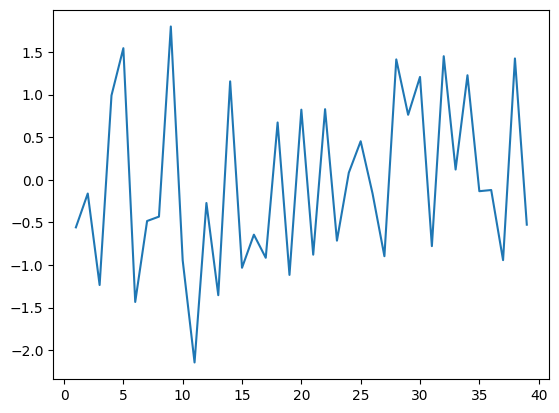

In [62]:
plt.plot(diffr)

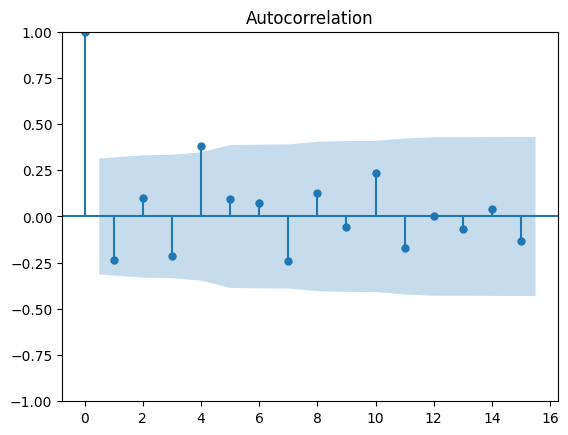

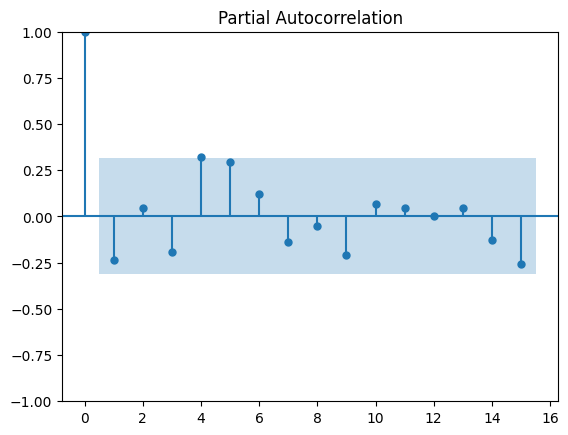

In [26]:
mmd=1

plot_acf(diffr,lags=15)
plt.show()
plot_pacf(diffr,lags=15)
plt.show()

In [30]:
model=ARIMA(df['value'],order=(1,1,1))
model=model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -52.798
Date:                Tue, 04 Nov 2025   AIC                            111.596
Time:                        02:36:21   BIC                            116.586
Sample:                             0   HQIC                           113.386
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9772      0.137     -7.134      0.000      -1.246      -0.709
ma.L1          0.8964      0.272      3.301      0.001       0.364       1.429
sigma2         0.8655      0.272      3.180      0.0

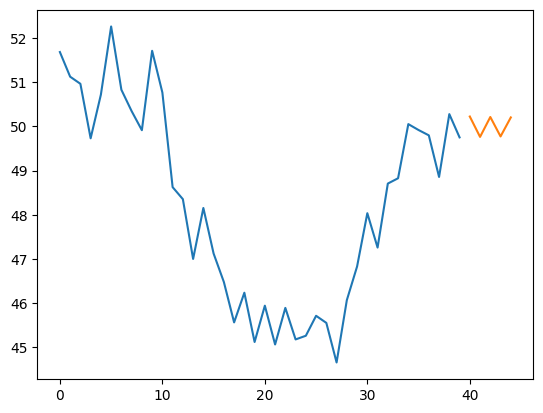

In [36]:
pre=model.forecast(steps=5)
plt.plot(df['value'])
plt.plot(pre.index,pre)
plt.show()

In [38]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp312-cp312-linux_x86_64.whl size=567860 sha256=e07e05c7cbe72290cf836cf1d75c09f47825cc5d77bdb8cdb8872ddc8e595c35
  Stored in directory: /root/.cache/pip/wheels/ab/d0/26/b82cb0f49ae73e5e6bba4e8462fff2c9851d7bd2ec64f8891e
Successfully built fastdtw


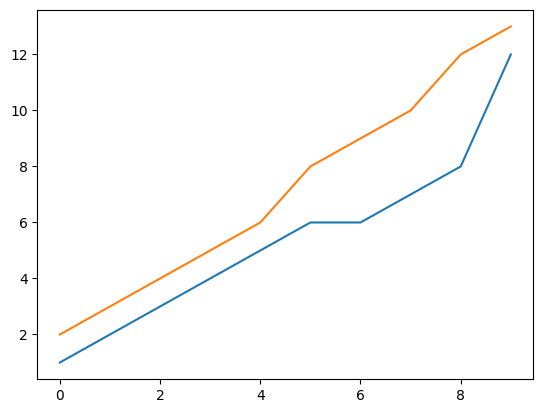

6.0 [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 4), (7, 5), (8, 6), (8, 7), (9, 8), (9, 9)]


In [41]:
from fastdtw import fastdtw
import numpy

s1=np.array([1,2,3,4,5,6,6,7,8,12])
s2=np.array([2,3,4,5,6,8,9,10,12,13])

plt.plot(s1,label='s1')
plt.plot(s2,label='s2')
plt.show()

distance,path=fastdtw(s1,s2,dist=lambda x,y:abs(x-y))
print(distance,path)


2
a-b,b-c,b-d,b-a
a-b,a-c,b-d,c-d


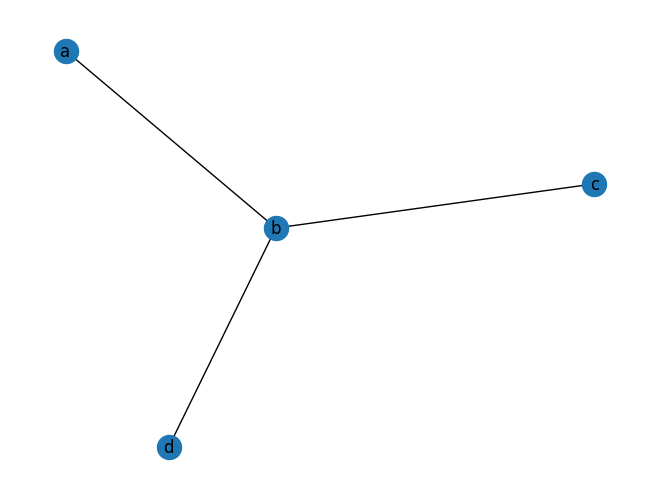

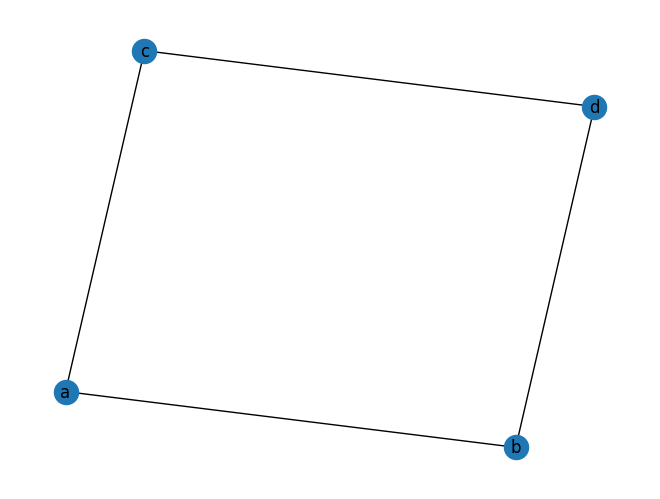

 {'b-d'} -> support->2
 {'a-b'} -> support->2
 {'b-d', 'a-b'} -> support->2


In [45]:
import numpy as np
import pandas as pd
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

def findsub(graphs,min_sup):
  all_edge=set()
  for g in graphs:
    all_edge |=g
  subgra=[]
  for i in range(1, len(all_edge)+1):
    for comb in combinations(all_edge,i):
      count=sum(set(comb).issubset(g) for g in graphs)
      if count>=min_sup:
        subgra.append((set(comb),count))
  return subgra

def drawgraph(graph):
  g=nx.Graph()
  for e in graph:
    u,v=e.split("-")
    g.add_edge(u.strip(),v.strip())
  pos=nx.spring_layout(g,seed=42)
  nx.draw(g,pos,with_labels=True)
  plt.show()


graphs=[]
n=int(input())
for i in range(n):
  inp=input().strip().split(",")
  edge_set = set(inp)
  graphs.append(edge_set)
for g in graphs:
  drawgraph(g)
freq=findsub(graphs,2)

for a , b in freq:
  print(f" {a} -> support->{b}")
2
a-b,b-c,b-d,b-a
a-b,a-c,b-d,c-d

enter graph
A-B,B-C,C-D,D-E,E-F


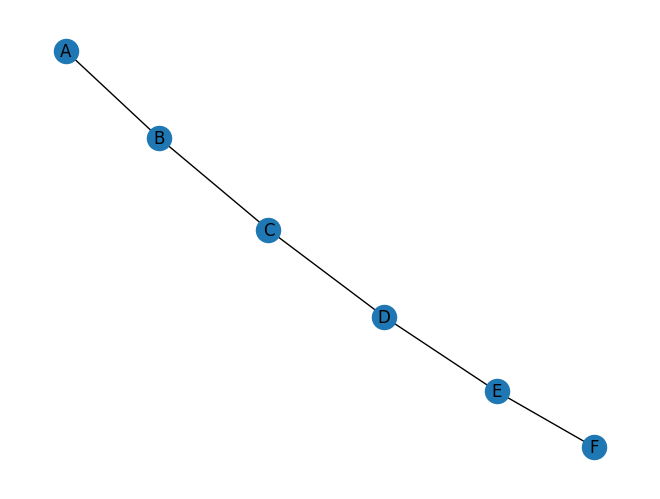

['D', 'F', 'E']
['C', 'A', 'B']


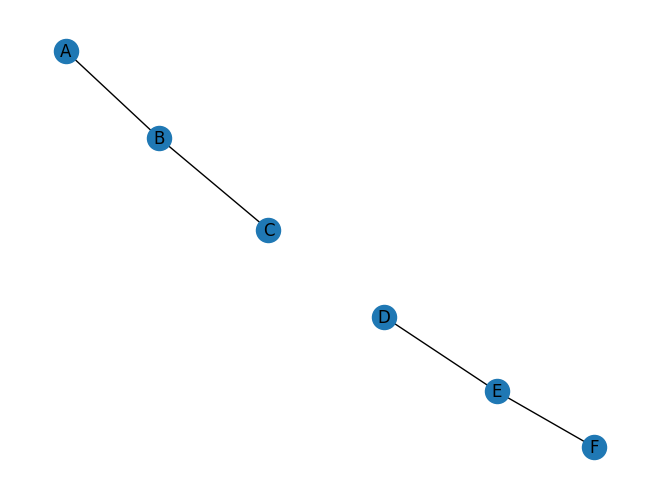

In [61]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def gnw(g):
  g=g.copy()

  steps=[list(g.edges())]
  while g.number_of_edges()>0:
    bt=nx.edge_betweenness_centrality(g)
    maxb=max(bt.values())
    edge_torem=[edge for edge,val in bt.items() if val==maxb]
    g.remove_edges_from(edge_torem)
    steps.append(list(g.edges()))
    comp=[list(c) for c in nx.connected_components(g)]
    if len(comp)>1:
      return comp,steps
  return comp,steps

print('enter graph')
inp=input().strip().split(",")
inp=set(inp)
g=nx.Graph()
for e in inp:
  u,v=e.split("-")
  g.add_edge(u.strip(),v.strip())
pos=nx.spring_layout(g,seed=42)
nx.draw(g,pos,with_labels=True)
plt.show()

community,steps=gnw(g)
for c in community:
  print(c)
temp=nx.Graph()
temp.add_edges_from(steps[1])
nx.draw(temp,pos,with_labels=True)
plt.show()

In [ ]:
from gsppy.gsp import GSP
min_support_count = 2
min_support = min_support_count / len(sequences)
gsp_instance = GSP(sequences)
frequent_sequences = gsp_instance.search(min_support)

for freq_dict in frequent_sequences:
    for pattern, support in freq_dict.items():
        print(pattern,"-> support",support)


#spade
from pymining import seqmining
min_support = 2

freq_seqs_spade = seqmining.freq_seq_enum(sequences, min_support)
print("Frequent Sequential Patterns (SPADE):")
for seq, freq in freq_seqs_spade:
    print(seq, "-> support:", freq)

In [65]:
import networkx as nx

def grenew(g):
  g=g.copy()
  steps=[list(g.edges())]
  while g.number_of_edges()>0:
    bt=nx.edge_betweenness_centrality(g)
    m=max(bt.values())
    ed_r=[e for e,v in bt.items() if v==m]
    g.remove_edges_from(ed_r)
    steps.append(list(g.edges()))
    comp=[list(c) for c in nx.connected_components(g)]
    if len(comp)>1:
      return comp,steps
  return comp,steps
print("input graph:")
inp=input().split(",")
inp=set(inp)
g=nx.Graph()
for e in inp:
  u,v=e.split("-")
  g.add_edge(u.strip(),v.strip())
freq,step=grenew(g)
print(freq)


input graph:
A-B,B-C,C-D,D-E,E-F
[['D', 'F', 'E'], ['C', 'A', 'B']]
